In [1]:
!pip install timm

You should consider upgrading via the 'C:\Users\lkk68\.conda\envs\mycondapy39\python.exe -m pip install --upgrade pip' command.


In [1]:
!pip list

Package                       Version
----------------------------- -----------
anyio                         3.6.2
argon2-cffi                   21.3.0
argon2-cffi-bindings          21.2.0
asttokens                     2.2.1
attrs                         22.2.0
Babel                         2.12.1
backcall                      0.2.0
backports.functools-lru-cache 1.6.4
beautifulsoup4                4.12.2
bleach                        6.0.0
brotlipy                      0.7.0
certifi                       2022.12.7
cffi                          1.15.1
charset-normalizer            2.0.4
colorama                      0.4.6
comm                          0.1.3
contourpy                     1.0.5
cryptography                  39.0.1
cycler                        0.11.0
debugpy                       1.6.7
decorator                     5.1.1
defusedxml                    0.7.1
entrypoints                   0.4
executing                     1.2.0
fastjsonschema                2.16.3
filelock 

# Test timm

## Mobilenet

In [2]:
import timm
m = timm.create_model('mobilenetv3_large_100', pretrained=True)
m.eval() #The returned PyTorch model is set to train mode by default

/home/lkk/miniconda3/envs/mypy310/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Downloading: "https://github.com/rwightman/pytorch-image-models/releases/download/v0.1-weights/mobilenetv3_large_100_ra-f55367f5.pth" to /home/lkk/.cache/torch/hub/checkpoints/mobilenetv3_large_100_ra-f55367f5.pth


MobileNetV3(
  (conv_stem): Conv2d(3, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
  (bn1): BatchNormAct2d(
    16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True
    (drop): Identity()
    (act): Hardswish()
  )
  (blocks): Sequential(
    (0): Sequential(
      (0): DepthwiseSeparableConv(
        (conv_dw): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=16, bias=False)
        (bn1): BatchNormAct2d(
          16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True
          (drop): Identity()
          (act): ReLU(inplace=True)
        )
        (se): Identity()
        (conv_pw): Conv2d(16, 16, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn2): BatchNormAct2d(
          16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True
          (drop): Identity()
          (act): Identity()
        )
        (drop_path): Identity()
      )
    )
    (1): Sequential(
      (0): InvertedResidual(
 

In [3]:
m.pretrained_cfg

{'url': 'https://github.com/rwightman/pytorch-image-models/releases/download/v0.1-weights/mobilenetv3_large_100_ra-f55367f5.pth',
 'num_classes': 1000,
 'input_size': (3, 224, 224),
 'pool_size': (7, 7),
 'crop_pct': 0.875,
 'interpolation': 'bicubic',
 'mean': (0.485, 0.456, 0.406),
 'std': (0.229, 0.224, 0.225),
 'first_conv': 'conv_stem',
 'classifier': 'classifier',
 'architecture': 'mobilenetv3_large_100'}

In [4]:
data_cfg = timm.data.resolve_data_config(m.pretrained_cfg)

In [5]:
transform = timm.data.create_transform(**data_cfg)

In [6]:
transform

Compose(
    Resize(size=256, interpolation=bicubic, max_size=None, antialias=warn)
    CenterCrop(size=(224, 224))
    ToTensor()
    Normalize(mean=tensor([0.4850, 0.4560, 0.4060]), std=tensor([0.2290, 0.2240, 0.2250]))
)

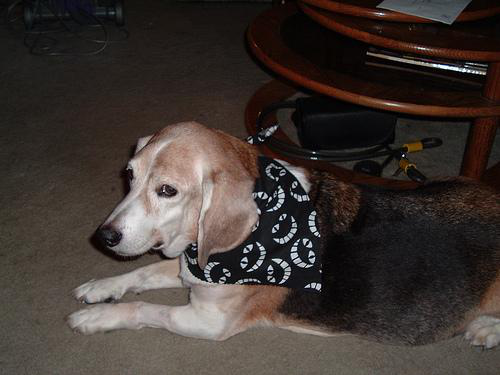

In [7]:
import requests
from PIL import Image
from io import BytesIO
url = 'https://datasets-server.huggingface.co/assets/imagenet-1k/--/default/test/12/image/image.jpg'
image = Image.open(requests.get(url, stream=True).raw)
image

In [8]:
model = timm.create_model('mobilenetv3_large_100', pretrained=True).eval()
transform = timm.data.create_transform(**timm.data.resolve_data_config(model.pretrained_cfg))

In [9]:
image_tensor = transform(image)
image_tensor.shape

torch.Size([3, 224, 224])

In [10]:
output = model(image_tensor.unsqueeze(0))
output.shape

torch.Size([1, 1000])

In [11]:
import torch

In [12]:
probabilities = torch.nn.functional.softmax(output[0], dim=0)
probabilities.shape

torch.Size([1000])

In [13]:
values, indices = torch.topk(probabilities, 5)

In [14]:
indices

tensor([162, 166, 161, 164, 167])

In [15]:
values

tensor([0.8486, 0.0375, 0.0246, 0.0103, 0.0070], grad_fn=<TopkBackward0>)

In [16]:
IMAGENET_1k_URL = 'https://storage.googleapis.com/bit_models/ilsvrc2012_wordnet_lemmas.txt'
IMAGENET_1k_LABELS = requests.get(IMAGENET_1k_URL).text.strip().split('\n')

In [18]:
IMAGENET_1k_LABELS

['tench, Tinca_tinca',
 'goldfish, Carassius_auratus',
 'great_white_shark, white_shark, man-eater, man-eating_shark, Carcharodon_carcharias',
 'tiger_shark, Galeocerdo_cuvieri',
 'hammerhead, hammerhead_shark',
 'electric_ray, crampfish, numbfish, torpedo',
 'stingray',
 'cock',
 'hen',
 'ostrich, Struthio_camelus',
 'brambling, Fringilla_montifringilla',
 'goldfinch, Carduelis_carduelis',
 'house_finch, linnet, Carpodacus_mexicanus',
 'junco, snowbird',
 'indigo_bunting, indigo_finch, indigo_bird, Passerina_cyanea',
 'robin, American_robin, Turdus_migratorius',
 'bulbul',
 'jay',
 'magpie',
 'chickadee',
 'water_ouzel, dipper',
 'kite',
 'bald_eagle, American_eagle, Haliaeetus_leucocephalus',
 'vulture',
 'great_grey_owl, great_gray_owl, Strix_nebulosa',
 'European_fire_salamander, Salamandra_salamandra',
 'common_newt, Triturus_vulgaris',
 'eft',
 'spotted_salamander, Ambystoma_maculatum',
 'axolotl, mud_puppy, Ambystoma_mexicanum',
 'bullfrog, Rana_catesbeiana',
 'tree_frog, tree-f

In [19]:
[{'label': IMAGENET_1k_LABELS[idx], 'value': val.item()} for val, idx in zip(values, indices)]

[{'label': 'beagle', 'value': 0.8486219644546509},
 {'label': 'Walker_hound, Walker_foxhound', 'value': 0.03753999248147011},
 {'label': 'basset, basset_hound', 'value': 0.0246285330504179},
 {'label': 'bluetick', 'value': 0.010317105799913406},
 {'label': 'English_foxhound', 'value': 0.006958038546144962}]

## Resnet

In [20]:
model=timm.create_model('resnet50d', pretrained=True, features_only=True)

Downloading: "https://github.com/rwightman/pytorch-image-models/releases/download/v0.1-weights/resnet50d_ra2-464e36ba.pth" to /home/lkk/.cache/torch/hub/checkpoints/resnet50d_ra2-464e36ba.pth


In [21]:
model.feature_info.module_name()

['act1', 'layer1', 'layer2', 'layer3', 'layer4']

In [22]:
model.feature_info.reduction()

[2, 4, 8, 16, 32]

In [23]:
model.feature_info.channels()

[64, 256, 512, 1024, 2048]

In [24]:
out=model(image_tensor.unsqueeze(0))

In [25]:
len(out)

5

In [26]:
for o in out:
    print(o.shape)

torch.Size([1, 64, 112, 112])
torch.Size([1, 256, 56, 56])
torch.Size([1, 512, 28, 28])
torch.Size([1, 1024, 14, 14])
torch.Size([1, 2048, 7, 7])


In [27]:
import matplotlib.pyplot as plt
%matplotlib inline

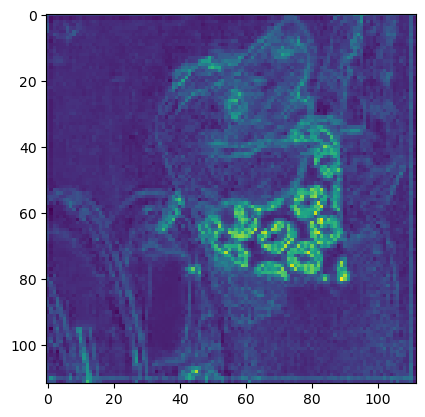

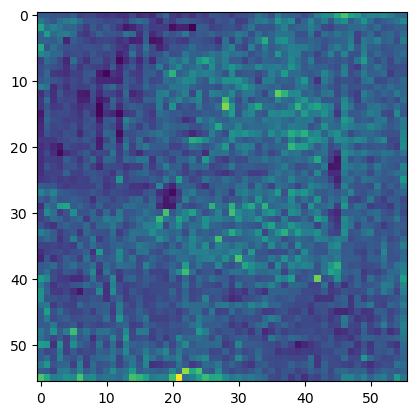

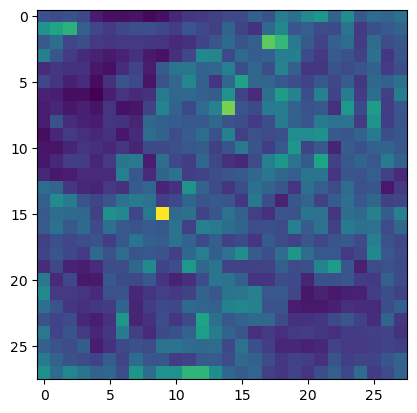

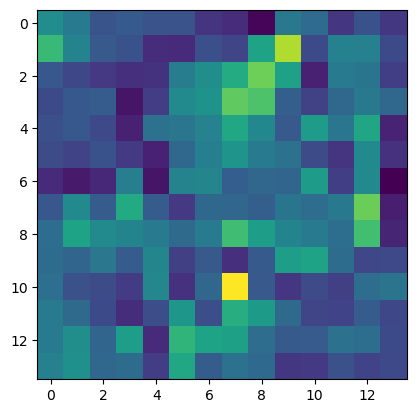

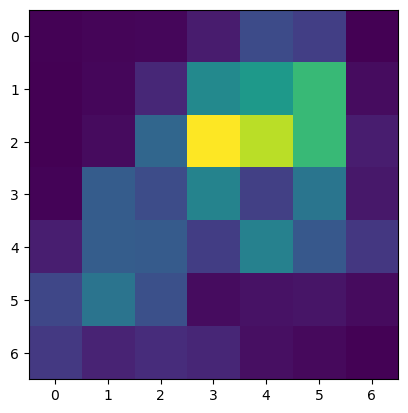

In [28]:
for o in out:
    plt.imshow(o[0].transpose(0,2).sum(-1).detach().numpy())
    plt.show()

## ONNX for Resnet

In [29]:
model_out=timm.create_model('resnet50d', pretrained=True, exportable=True)
model_out.eval()

ResNet(
  (conv1): Sequential(
    (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
    (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (4): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU(inplace=True)
    (6): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
  )
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (act1): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (act1): ReLU(inplace=True)
      (conv2): Co

In [30]:
x =torch.randn(2,3,224,224, requires_grad=True)
torch_out=model_out(x)

In [31]:
torch_out

tensor([[ 0.0075, -0.0759, -0.0053,  ..., -0.1596,  0.0056, -0.2423],
        [-0.0290, -0.1203,  0.0066,  ..., -0.1646, -0.0024, -0.2391]],
       grad_fn=<AddmmBackward0>)

In [38]:
!pip install onnx

You should consider upgrading via the 'C:\Users\lkk68\.conda\envs\mycondapy39\python.exe -m pip install --upgrade pip' command.


In [33]:
torch.onnx.export(model_out, x, "resnet50d.onnx", export_params=True, opset_version=10,do_constant_folding=True,
                  input_names = ['input'],
                 output_names=['output'],
                 dynamic_axes={'input': {0: 'batch_size'},
                              'output': {0: 'batch_size'}})

================ Diagnostic Run torch.onnx.export version 2.0.0 ================
verbose: False, log level: Level.ERROR
======================= 0 NONE 0 NOTE 0 WARNING 0 ERROR ========================



In [34]:
!dir

Pytorch-3.ipynb    inference.py    siamese_network.py  testtimm.ipynb
Pytorch-HPC.ipynb  multiGPU.py	   singleGPU.py        torchdata.py
imagenet.py	   resnet50d.onnx  testTorchDDP.py     torchhubmodel.py


In [35]:
import onnx
onnx_model = onnx.load("resnet50d.onnx")

In [36]:
onnx.checker.check_model(onnx_model)

In [37]:
traced_model=torch.jit.trace(model_out, torch.rand(8,3,224,224))

In [38]:
type(traced_model)

torch.jit._trace.TopLevelTracedModule

In [39]:
traced_output=traced_model(torch.rand(8,3,224,224))

In [40]:
traced_output.shape

torch.Size([8, 1000])

## Torch-TRT

In [46]:
!pip install torch-tensorrt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.2/15.2 MB 7.1 MB/s eta 0:00:0000:0100:01
     ━━━━━━━╸━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 171.2/887.5 MB 7.0 MB/s eta 0:01:42^C
     ━━━━━━━╸━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 171.2/887.5 MB 7.0 MB/s eta 0:01:43
ERROR: Operation cancelled by user


In [45]:
import torch
import torch_tensorrt
import timm
import time
import numpy as np
import torch.backends.cudnn as cudnn
from timm.data import resolve_data_config
from timm.data.transforms_factory import create_transform
import json 

efficientnet_b0_model = timm.create_model('efficientnet_b0',pretrained=True)
model = efficientnet_b0_model.eval().to("cuda")

ModuleNotFoundError: No module named 'torch_tensorrt'